In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(PROJECT_ROOT)

from src.data.load_data import (
    load_clean_transactions,
    load_clean_token_transfers
)

In [18]:
tx = load_clean_transactions()
token_tx = load_clean_token_transfers()

tx.head(), 
token_tx.head()


,transaction_hash,from_address,to_address,block_number,token_address,raw_value,block_timestamp,usd_value
0,0x6063548b1eddc2dc0ff730961b1a5a7ba7eaee0389c6...,0x4f95c5ba0c7c69fb2f9340e190ccee890b3bd87c,0x774ae279c21b6a17a6e2bd5ab5398ff98f398807,23772289,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,348189271397,2025-11-11 00:00:11+00:00,348189.271397
1,0x1b4a2a387a6116cd503e8c1b2a9bcc672ecd2088d5d1...,0x6325b3ad5c06805cb51cd3e3442a37a236b5bcb9,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,23772289,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,20654786061,2025-11-11 00:00:11+00:00,20654.786061
2,0x07371b18f7cce42fb49651f5efad71be13ba27475ea2...,0xeff6cb8b614999d130e537751ee99724d01aa167,0xa253a752bcfd061c4219b93acb726e0983398111,23772289,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,46500000000,2025-11-11 00:00:11+00:00,46500.000000
3,0xcf04b5a427b3924c2fb11bf508a5f8c142e7e0738c43...,0xfbd4cdb413e45a52e2c8312f670e9ce67e794c37,0xd0fc8ba7e267f2bc56044a7715a489d851dc6d78,23772289,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,13276870954,2025-11-11 00:00:11+00:00,13276.870954
4,0x1b4a2a387a6116cd503e8c1b2a9bcc672ecd2088d5d1...,0xbc23a189a7f7ee3b4eee1d621c79a9978dfb1a7d,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,23772289,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,52386897658,2025-11-11 00:00:11+00:00,52386.897658


## Newwork Size  Overview

In [19]:
print("=== ETH Transactions ===")
print("Rows:", len(tx))
print("Unique from:", tx['from_address'].nunique())
print("Unique to:", tx['to_address'].nunique())
print("Unique addresses:", pd.concat([tx['from_address'], tx['to_address']]).nunique())

print("\n=== Token Transfers ===")
print("Rows:", len(token_tx))
print("Unique from:", token_tx['from_address'].nunique())
print("Unique to:", token_tx['to_address'].nunique())
print("Unique addresses:", pd.concat([token_tx['from_address'], token_tx['to_address']]).nunique())



=== ETH Transactions ===
Rows: 13268
Unique from: 6368
Unique to: 5123
Unique addresses: 7796

=== Token Transfers ===
Rows: 103796
Unique from: 19555
Unique to: 19393
Unique addresses: 24661


## Time Range

In [20]:
print("ETH Time Range:")
print(tx["block_timestamp"].min())
print(tx["block_timestamp"].max())

ETH Time Range:
2025-11-11 00:00:11+00:00
2025-11-11 23:59:59+00:00


In [21]:
print("Token Time Range:")
print(token_tx["block_timestamp"].min())
print(token_tx["block_timestamp"].max())

Token Time Range:
2025-11-11 00:00:11+00:00
2025-11-11 23:59:59+00:00


## Time-series Plot 

Here should be some daily or weekly, but limited by disk space for now, I only do hourly.


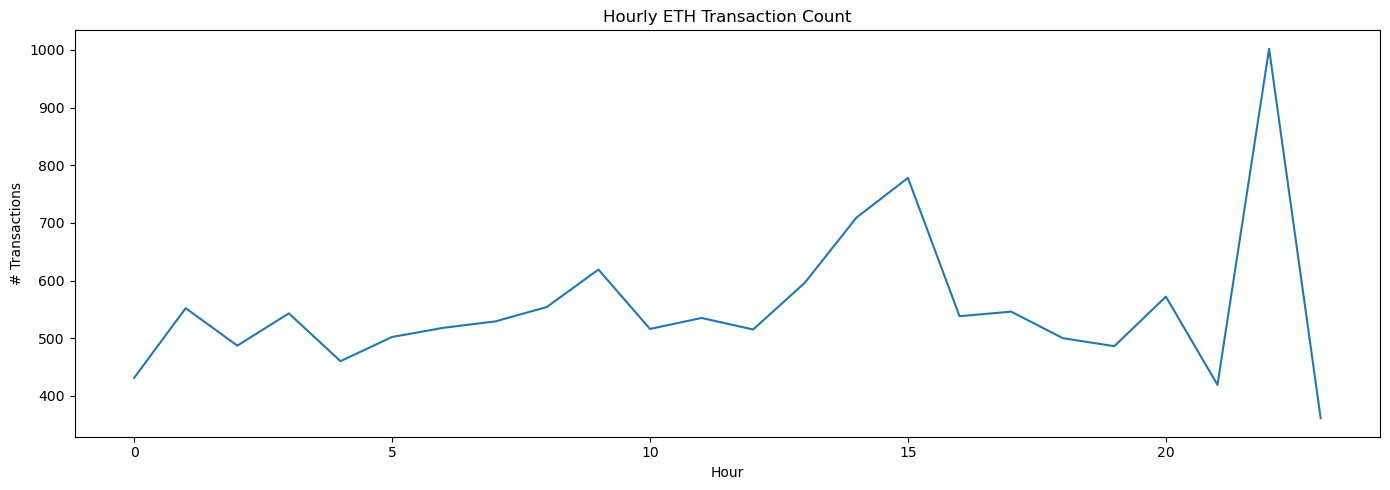

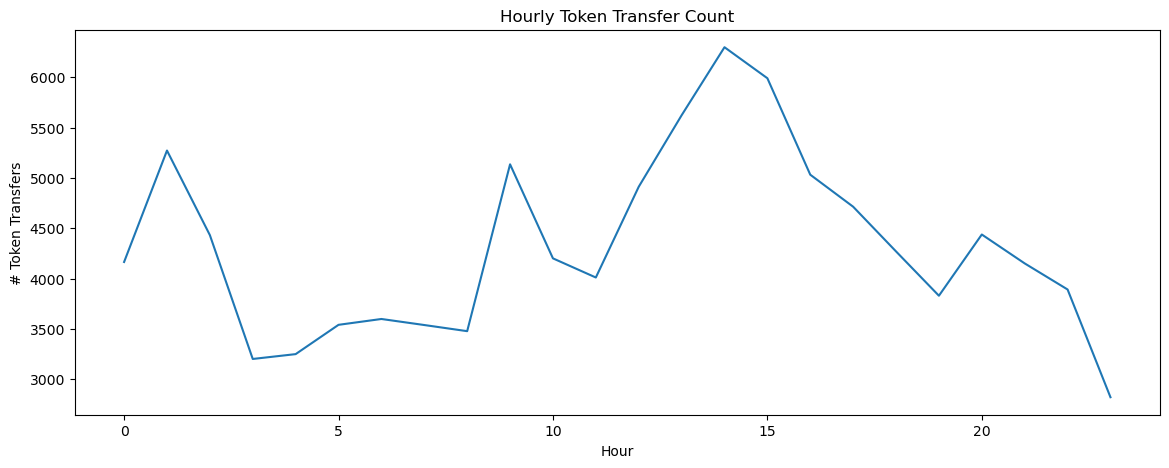

In [33]:
# ETH 
if not pd.api.types.is_datetime64_any_dtype(tx["block_timestamp"]):
	tx["block_timestamp"] = pd.to_datetime(tx["block_timestamp"])

tx_hour = tx.groupby(tx["block_timestamp"].dt.hour).size()

plt.figure(figsize=(14,5))
plt.plot(tx_hour.index, tx_hour.values)
plt.title("Hourly ETH Transaction Count")
plt.xlabel("Hour")
plt.ylabel("# Transactions")
plt.tight_layout()
plt.show()

# Token Transfers
if not pd.api.types.is_datetime64_any_dtype(token_tx["block_timestamp"]):
    token_tx["block_timestamp"] = pd.to_datetime(token_tx["block_timestamp"])
token_tx_hour = token_tx.groupby(token_tx["block_timestamp"].dt.hour).size()
plt.figure(figsize=(14,5))
plt.plot(token_tx_hour)
plt.title("Hourly Token Transfer Count")
plt.xlabel("Hour")
plt.ylabel("# Token Transfers")
plt.show()


## Top Active Addresses( senders and receivers)

Top 5 Senders in Token Transfers:
from_address
0xfbd4cdb413e45a52e2c8312f670e9ce67e794c37    3681
0x51c72848c68a965f66fa7a88855f9f7784502a7f    3344
0xbbbbbbbbbb9cc5e90e3b3af64bdaf62c37eeffcb    2238
0x9008d19f58aabd9ed0d60971565aa8510560ab41    2153
0x000000000004444c5dc75cb358380d2e3de08a90    2124
Name: count, dtype: Int64
Top 5 Receivers in Token Transfers:
to_address
0xfbd4cdb413e45a52e2c8312f670e9ce67e794c37    3621
0x51c72848c68a965f66fa7a88855f9f7784502a7f    3614
0xa69babef1ca67a37ffaf7a485dfff3382056e78c    2489
0x9008d19f58aabd9ed0d60971565aa8510560ab41    2306
0xbbbbbbbbbb9cc5e90e3b3af64bdaf62c37eeffcb    2152
Name: count, dtype: Int64


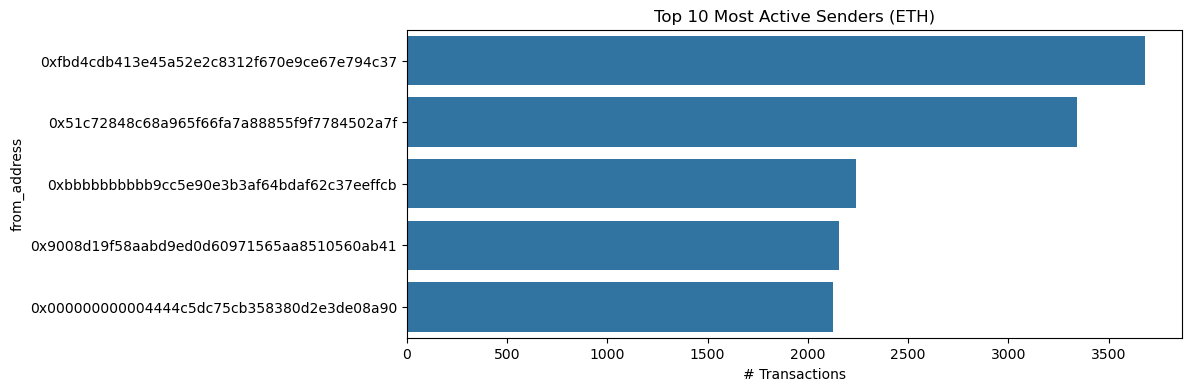

In [42]:
top_senders = token_tx['from_address'].value_counts().head(5)
print("Top 5 Senders in Token Transfers:")
print(top_senders)

top_resceivers = token_tx['to_address'].value_counts().head(5)
print("Top 5 Receivers in Token Transfers:")
print(top_resceivers)

plt.figure(figsize=(10,4))
sns.barplot(x=top_senders.values, y=top_senders.index)
plt.title("Top 5 Most Active Senders (ETH)")
plt.xlabel("# Transactions")
plt.show()


## Value Distribution Analysis

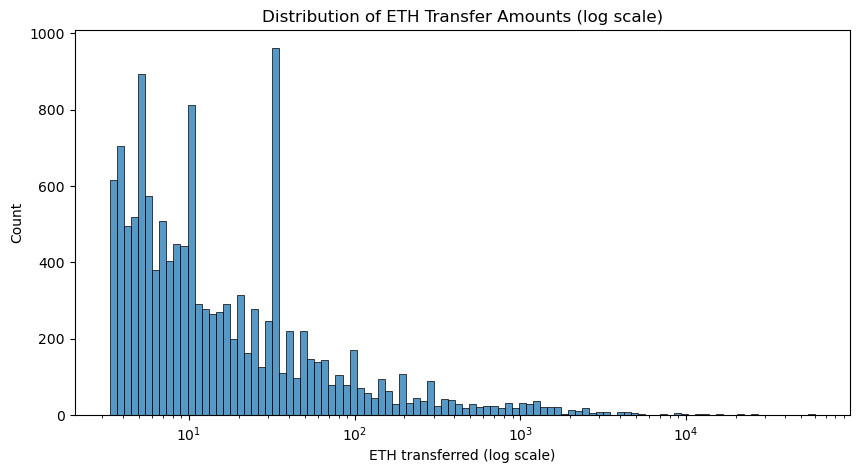

In [43]:
tx["value_eth"] = tx["value"] / 1e18   # Convert Wei to ETH, btw, 1 ETH = 10^18 Wei

plt.figure(figsize=(10,5))
sns.histplot(tx["value_eth"], log_scale=True, bins=100)
plt.title("Distribution of ETH Transfer Amounts (log scale)")
plt.xlabel("ETH transferred (log scale)")
plt.show()

# we can see that most transactions are small amounts, but there are some large transfers as well.
# generally follows a power-law distribution and heavy-tailed distribution

## Top actiive tokens Erc20 Contracts

Top 5 Most Active Token Contracts:
token_address
0xdac17f958d2ee523a2206206994597c13d831ec7    43176
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    38959
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2    21661
Name: count, dtype: Int64


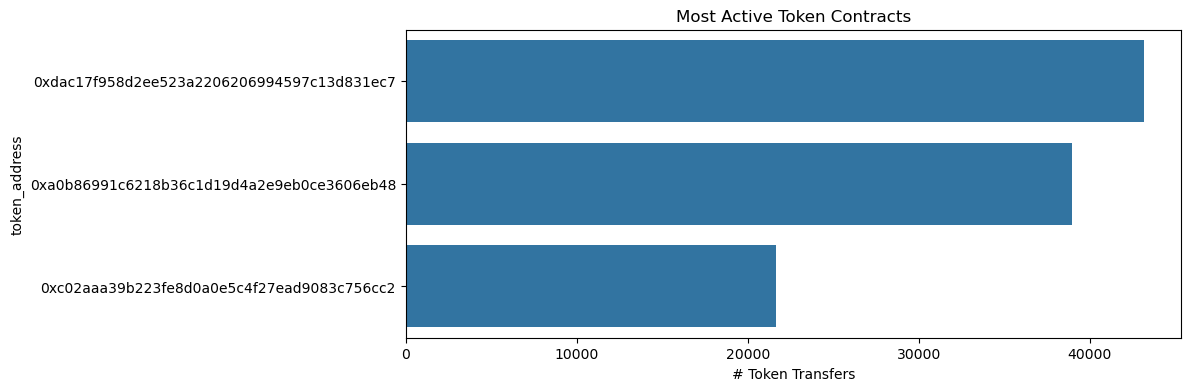

In [ ]:
top_tokens = token_tx['token_address'].value_counts().head(10)
print("Top 5 Most Active Token Contracts:")
print(top_tokens)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_tokens.values, y=top_tokens.index)
plt.title("Most Active Token Contracts")
plt.xlabel("# Token Transfers")
plt.show()

# here tokens are ETH-based tokens, ERC-20 tokens
# Only three here is beacause, I only querryed three tokens in the data collection step
# USDC, USDT and WETH
# You can add more tekens by modifying the sql [token_transfers_filtered (USDC / USDT / WETH)] 

In [50]:
top_tokens = token_tx["token_address"].value_counts().head(10)
top_tokens


token_address
0xdac17f958d2ee523a2206206994597c13d831ec7    43176
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    38959
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2    21661
Name: count, dtype: Int64

## Top tokens by Transfer Volume

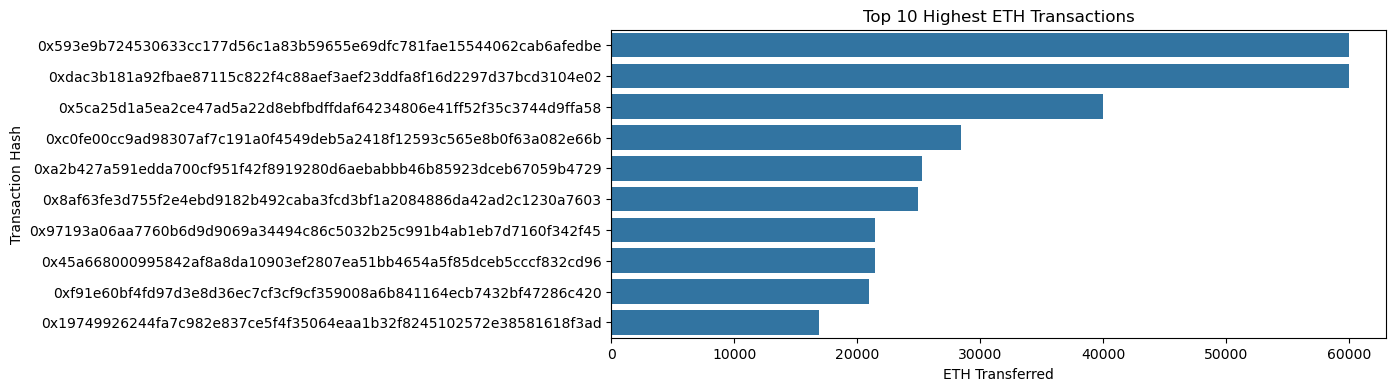

In [54]:
tx.sort_values("value_eth", ascending=False).head(10)

# Column Graph COmparison between transaction value in Whales
plt.figure(figsize=(10,4))
sns.barplot(x=tx.sort_values("value_eth", ascending=False).head(10)["value_eth"],
            y=tx.sort_values("value_eth", ascending=False).head(10)["hash"])
plt.title("Top 10 Highest ETH Transactions")
plt.xlabel("ETH Transferred")
plt.ylabel("Transaction Hash")
plt.show()  